In [14]:
def centroids_init(data,num_clusters):
    num_examples = data.shape[0]   #得到样本数目
    # 对0-num_examples之间的序列进行随机排序
    random_ids = np.random.permutation(num_examples)
    #取前num_clusters样本作为簇的初始质心
    centroids = data[random_ids[:num_clusters],:]
    return centroids

In [15]:
def centroids_find_closest(data,centroids):
    #计算离样本点最近的簇质心
    num_examples = data.shape[0]
    num_centroids = centroids.shape[0]
    closest_centroids_ids = np.zeros((num_examples,1))
    for example_index in range(num_examples):
        #遍历所有样本点
        distance = np.zeros((num_centroids,1))
        for centroid_index in range(num_centroids):
            #计算离每个簇质心的欧式距离
            distance_diff = data[example_index,:] \
                                - centroids[centroid_index,:]
            distance[centroid_index] = np.sum(distance_diff**2)
        #得到最近的簇质心
        closest_centroids_ids[example_index] =np.argmin(distance)
    return closest_centroids_ids

In [27]:
def centroids_compute(data,closest_centroids_ids,num_clusters):
    #更新簇的质心点
    num_features = data.shape[1]
    centroids = np.zeros((num_clusters,num_features))
    for centroid_id in range(num_clusters):
        #得到属于该簇的所有样本
        closest_ids = closest_centroids_ids == centroid_id
        #计算样本的均值，作为新的质点
        centroids[centroid_id] = np.mean(data[closest_ids.\
                                              flatten(),:],axis=0)
    return centroids

In [24]:
def train(data,num_clusters,max_iterations):
    #1.先随机选择K个中心点
    centroids = centroids_init(data,num_clusters)
    #2.开始训练
    num_examples = data.shape[0]
    closest_centroids_ids = np.empty((num_examples,1))
    for _ in range(max_iterations):
        #3得到当前每一个样本点到K个中心点的距离，找到最近的
        closest_centroids_ids = centroids_find_closest\
        (data,centroids)
        #4.进行簇中心点位置更新
        centroids = centroids_compute(data,closest_centroids_ids,\
                                      num_clusters)
    return centroids,closest_centroids_ids 

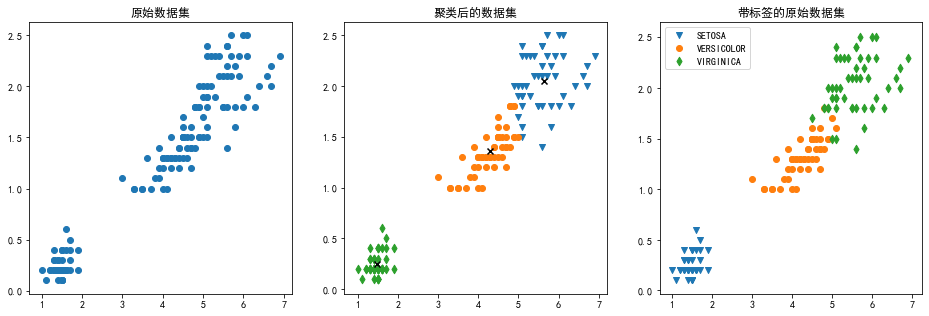

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
#读取样本数据
data = pd.read_csv('data/iris.csv')
#样本标签3类：'SETOSA','VERSICOLOR','VIRGINICA'
iris_types = ['SETOSA','VERSICOLOR','VIRGINICA']
#选取两个样本特征
x_axis = 'petal_length'
y_axis = 'petal_width'
#准备训练的样本数据集
num_examples = data.shape[0]
x_train = data[[x_axis,y_axis]].values.reshape(num_examples,2)
#指定训练所需的参数：簇的个数和迭代次数
num_clusters = 3
max_iteritions = 50
#调用已创建的聚类模型，返回聚簇结果
centroids,closest_centroids_ids =train(x_train,num_clusters,max_iteritions)
# 将聚类结果和原始数据集对比
plt.figure(figsize=(16,5))
mValue = ['v','o','d']
plt.subplot(1,3,1)
#显示原始数据集
plt.title('原始数据集')
plt.scatter(data[x_axis],data[y_axis])
plt.subplot(1,3,2)
#显示聚类后的样本集
plt.title('聚类后的数据集')
for centroid_id, centroid in enumerate(centroids):
    current_examples_index = (closest_centroids_ids == centroid_id)\
    .flatten()
    plt.scatter(data[x_axis][current_examples_index],\
        data[y_axis][current_examples_index],label = centroid_id,\
                marker=mValue[centroid_id])
#画出3个簇的质心
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0],centroid[1],c='black',marker = 'x')
plt.subplot(1,3,3)
# 显示带标签的样本集
plt.title('带标签的原始数据集')
for iris_id,iris_type in enumerate(iris_types):
    plt.scatter(data[x_axis][data['class']==iris_type],\
                data[y_axis][data['class']==iris_type],\
                label = iris_type,marker=mValue[iris_id])
plt.legend()
plt.show()
